Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [1]:
library(tidymodels)
library(readr)
library(moderndive)




Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.


Attaching package: ‘readr’


The following object is masked from ‘package:yardstick’:

    spec


The following object is masked from ‘package:scales’:

    col_factor




We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [3]:
hate_crimes = read.csv('http://bit.ly/2ItxYg3')
hate_crimes |> head()



,state,median_house_inc,share_pop_metro,hs,hate_crimes,trump_support,unemployment,urbanization,income
,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,New Mexico,low,0.69,83,0.295,low,high,low,46686
2,Maine,low,0.54,90,0.616,low,low,low,51710
3,New York,low,0.94,85,0.351,low,low,high,54310
4,Illinois,low,0.90,86,0.195,low,high,high,54916
5,Delaware,high,0.90,87,0.323,low,low,high,57522
6,Rhode Island,high,1.00,85,0.095,low,high,high,58633


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


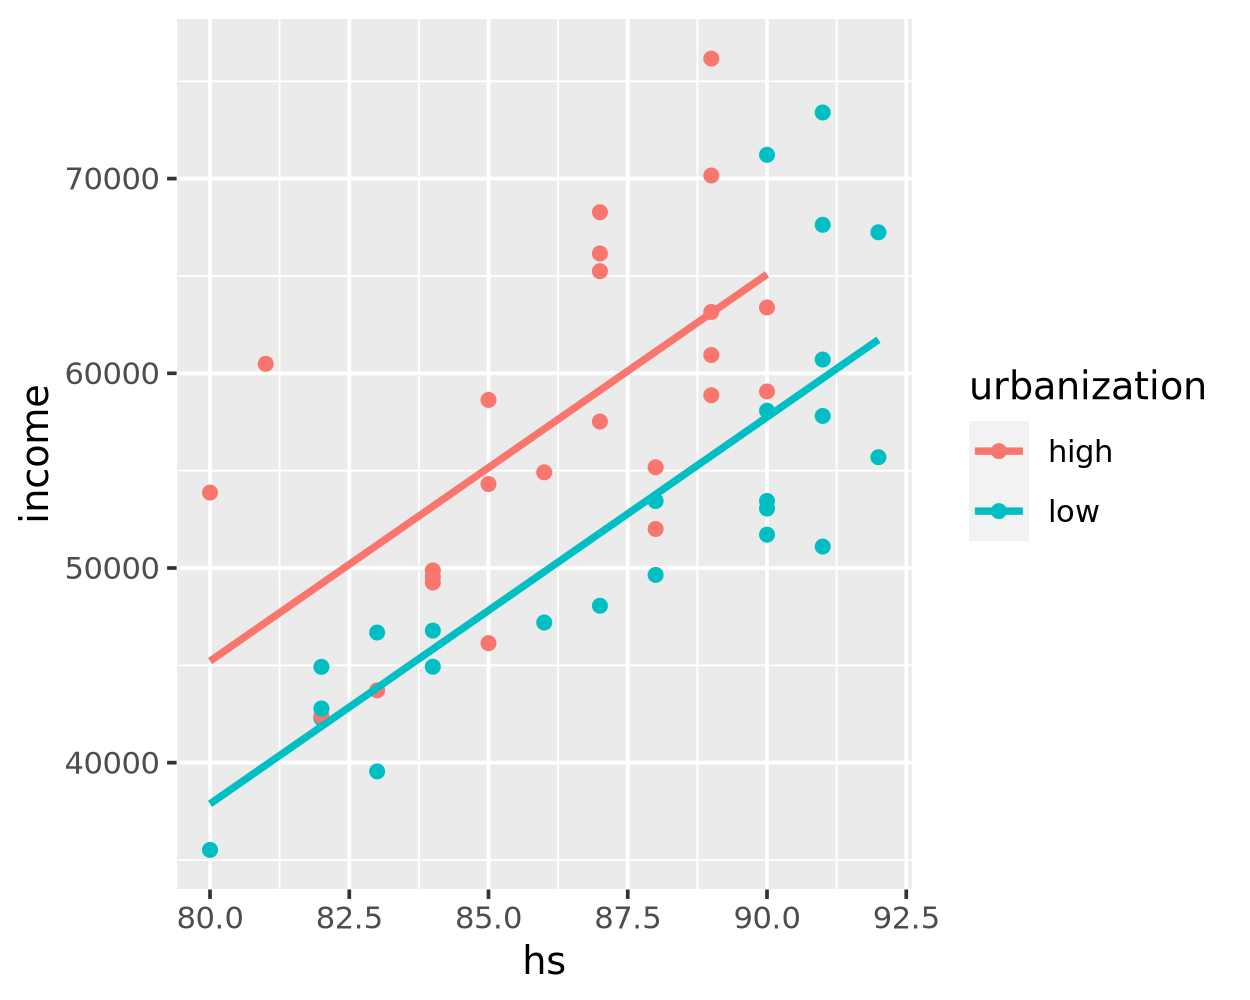

In [4]:
p = ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point() +
  geom_parallel_slopes(se = FALSE, na.rm = TRUE)

p



❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

In [ ]:
It appears high urbanization has a larger intercept. 



Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code you your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


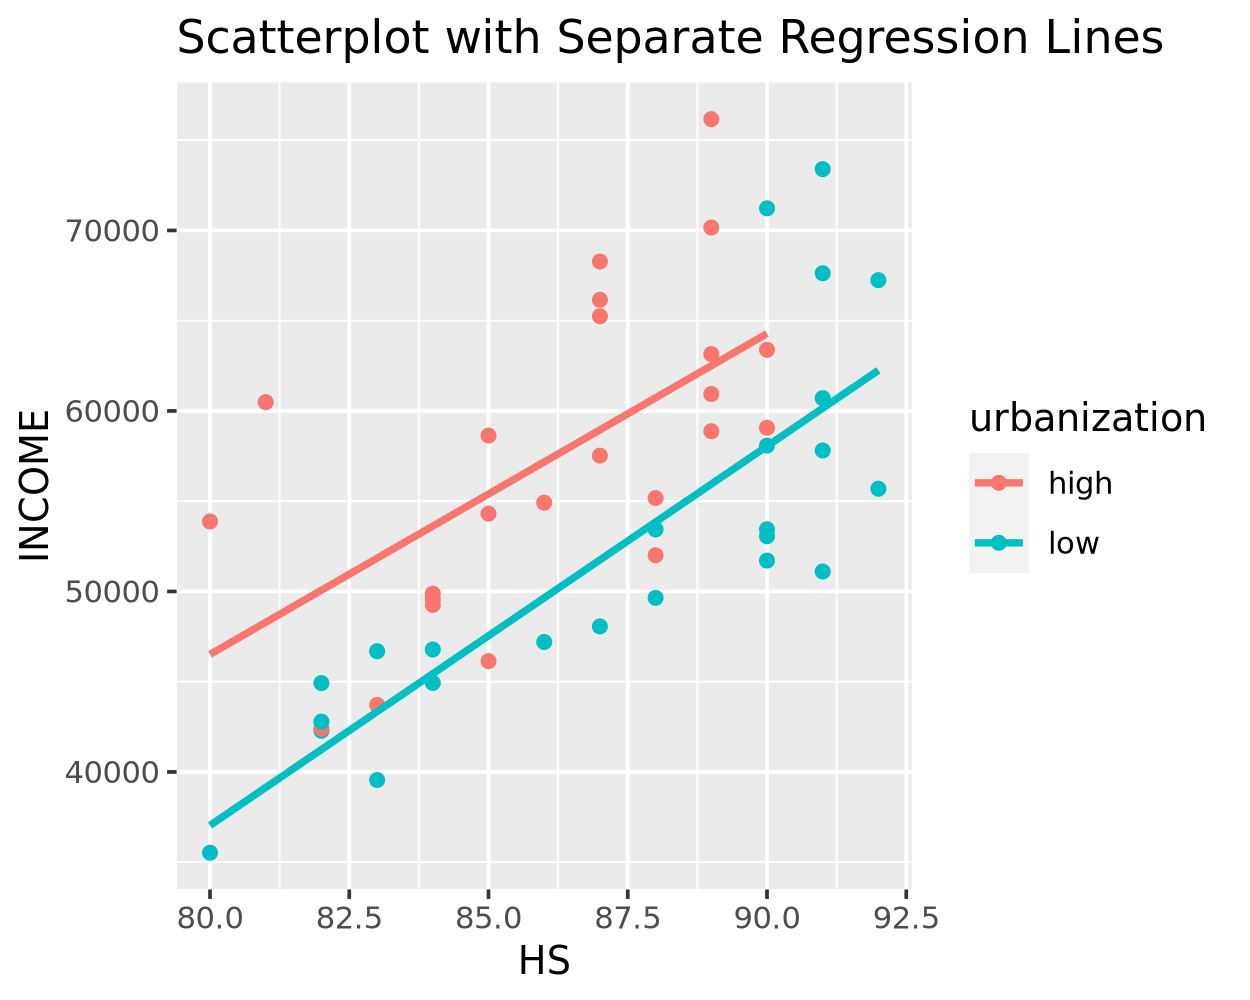

In [5]:
t = ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) + 
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Scatterplot with Separate Regression Lines",
       x = "HS",
       y = "INCOME")

t

❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

I think a more complex interaction model allows for more complex relationships in the data. If I think there may be a reason to
suspect that the variables, in this case income and percentage of people who have completed high school over the age of 25, might vary
based on urbanization, then an interaction model may be better suited. 

If I were to believe that there is no variation in the variables based on the level of urbanization, then a simpler model utilizing
parallel slopes might be appropriate.



Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [6]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [7]:
# non-parallel slopes model

# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...



nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   
    step_dummy(urbanization) |>    
    step_interact(~ starts_with("urbanization"):hs) |>
    prep()                         # run the recipe on the training data provided

mod2 = linear_reg() |> set_engine('lm')

nps_mod = mod2 |> fit(income ~ ., juice(nps_rec))

nps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [8]:
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction"))

tidy(model) |> summarize(r_squared = var(.pred) / var(income))


income,.pred,.resid,model
<int>,<dbl>,<dbl>,<chr>
46686,43845.37,2840.63106,parallel_slopes
51710,57752.93,-6042.92572,parallel_slopes
54310,55152.28,-842.28220,parallel_slopes
54916,57139.08,-2223.07603,parallel_slopes
57522,59125.87,-1603.86985,parallel_slopes
58633,55152.28,3480.71780,parallel_slopes
58875,63099.46,-4224.45751,parallel_slopes
59068,65086.25,-6018.25133,parallel_slopes
60487,47205.11,13281.89310,parallel_slopes


ERROR: Error in eval(expr, envir, enclos): object 'model' not found


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [9]:
glance(ps_mod)
glance(nps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5746731,0.5456735,6374.244,19.81661,2.814509e-08,3,-486.5018,983.0035,992.3595,1787763166,44,48


❓Compare the adjusted proportion of variance account for each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

In [ ]:
The adjusted r squared value for the parallel model is slightly higher than that of the non-parallel model, meaning it fits
the data slightly better. Which leads me to believe that the parallel model is possibly the model of preference. 



❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [12]:
tidy(ps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


Looking at my estimate for urbanization_low, it would appear that on average, states with lower levels of urbanization tend to have incomes that are about $7,333 lower than states
with higher levels of urbanization.


❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

Every one percentage point increase of hs educated adults in a state is associated with a $1986.79 increase in income.

